# Run the GP optimizer in four dimensions

In [1]:
%run -i ../../../examples/prepare_gp_optimizer.py

dofs = [kbv.x_rot, kbv.offz, kbh.x_rot, kbh.offz]

hard_bounds = np.array([[-0.10, +0.10], [-0.50, +0.50], [-0.10, +0.10], [-0.50, +0.50]])

for dof in dofs:
    dof.kind = "hinted"

In [2]:
gpo = Optimizer(
    init_scheme='quasi-random', 
    n_init=16, 
    run_engine=RE, 
    db=db, 
    detector=w9, 
    detector_type='image',
    dofs=dofs, 
    dof_bounds=hard_bounds, 
    fitness_model='max_sep_density',
    training_iter=100, 
    verbose=True,
)

learning with strategy "quasi-random" ...


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


    kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz    fitness
0    0.050422 -0.253957   0.056458  0.251785   6.567077
1   -0.049578 -0.142846   0.008458 -0.033929  10.462937
2    0.000422  0.190487  -0.031542 -0.421684   8.372921
3   -0.099578 -0.476179  -0.071542  0.149745        NaN
4    0.075422 -0.031735   0.088458 -0.278827   5.845301
5   -0.024578  0.301598   0.048458 -0.135970   7.022404
6    0.025422 -0.365068  -0.015542  0.435459  10.907687
7   -0.074578  0.153450  -0.055542  0.292602   7.514103
8    0.062922  0.486783  -0.095542  0.006887        NaN
9   -0.037078 -0.179883   0.064458 -0.360460   6.923320
10   0.012922 -0.068772   0.024458  0.210969   8.059965
11  -0.087078  0.264561   0.000458 -0.217602   9.916744
12   0.087922 -0.402105  -0.039542 -0.074745   8.101668
13  -0.012078  0.042339  -0.079542  0.496683   7.788591
14   0.037922  0.375672   0.080458  0.353826   7.661418
15  -0.062078 -0.290994   0.040458  0.068112   7.326802


With four dimensions, we can no longer plot the parameter space in a satisfying way as we might be able to in two dimensions. We also have a lot more hyperparameters to deal with, and comparatively fewer points per dimension with which to infer them. One way to evaluate the state of the hyperparameters is with the Fisher information matrix, which encodes the covariance of their estimates with respect to the likelihood:

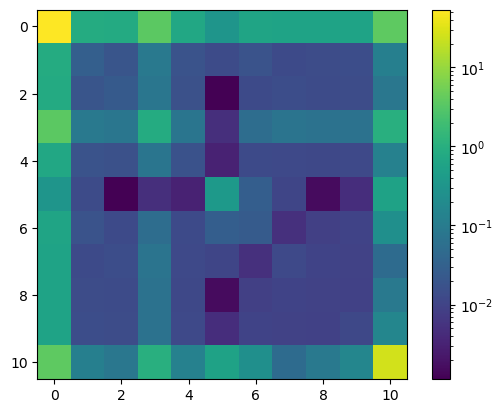

In [3]:
FM = gpo._contingent_fisher_information_matrix(gpo.test_params[0])[0]
plt.imshow(np.abs(FM), norm=mpl.colors.LogNorm())
plt.colorbar()

In particular, we can use the information matrix to sample points which will tell us the most about the hyperparameters:

In [4]:
gpo.learn(n_iter=1, n_per_iter=1, strategy='A-optimal', greedy=True, reuse_hypers=False)
gpo.learn(n_iter=1, n_per_iter=1, strategy='D-optimal', greedy=True, reuse_hypers=False)

learning with strategy "A-optimal" ...


    kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz   fitness
16  -0.037169 -0.389193   0.048678  0.065321  6.987869
learning with strategy "D-optimal" ...


    kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz   fitness
17  -0.038475 -0.280058   0.047029  0.089382  7.020893


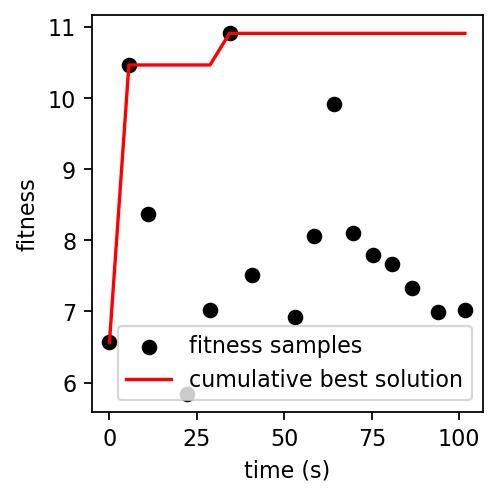

In [5]:
gpo.plot_fitness()